In [79]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
%matplotlib inline

In [ ]:
#nltk.download_shell()

In [5]:
messages_data = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [7]:
for messagage_num,message in enumerate(messages_data[:10]):
    print(messagage_num, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [9]:
messages_data[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
# we see that this data is tab formated 
# we can use pandas to create a data frame of 2 columns

In [10]:
messages_data = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['labels', 'message'])

In [11]:
# now display this data frame
messages_data.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
messages_data.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [17]:
messages_data.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [18]:
# we are going to have to feature engineer 

In [19]:
# add a length of message column called length
messages_data['length'] = messages_data['message'].apply(len)

In [20]:
messages_data.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

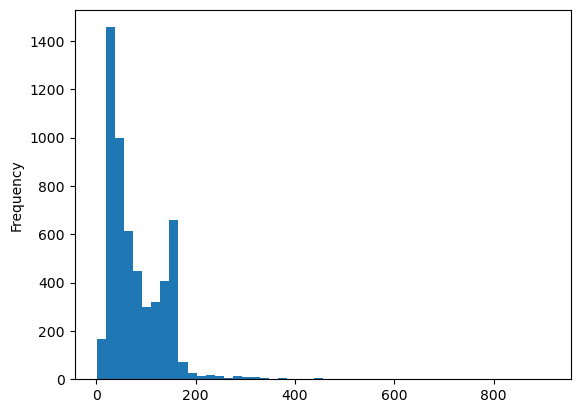

In [23]:
messages_data['length'].plot.hist(bins=50)

In [24]:
messages_data['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [27]:
# lets try to find the longest text
messages_data[messages_data['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

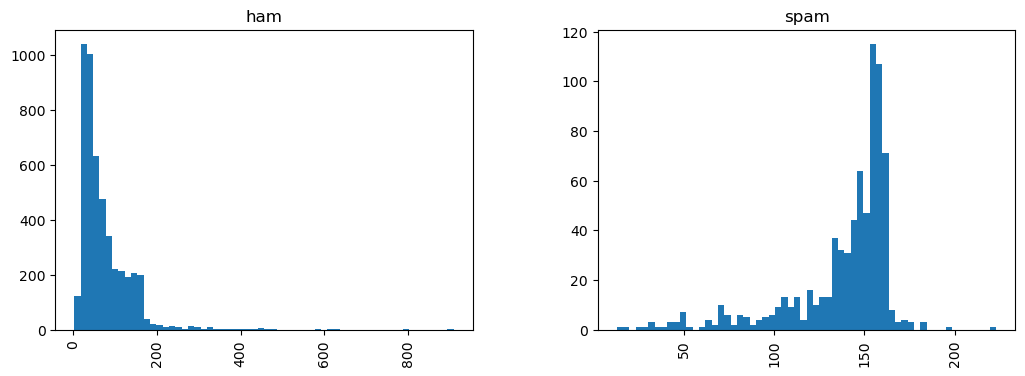

In [30]:
messages_data.hist(column='length', by='labels', bins=60, figsize=(12,4))

In [31]:
# from the histogram we see that spam messages tend to have higher length count
# hence the length feature is good

In [ ]:
# we can also implement the method of bagging 

In [35]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [74]:
['s' for w in string.punctuation if w == 'b']

[]

In [87]:
# first we can remove the stopwaords as they dont provide any value to the modole
def text_processing(message_to_modify):    
    # first remove punctuations
    modified_message = [char for char in message_to_modify if char not in string.punctuation]
    # make it a sentence again
    modified_message = ''.join(modified_message)  
    # remove stopwards
    return [words for words in message_to_modify.split() if words.lower() not in stopwords.words('english')]

In [88]:
messages_data['message'].apply(text_processing)

0       [Go, jurong, point,, crazy.., Available, bugis...
1                    [Ok, lar..., Joking, wif, u, oni...]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3       [U, dun, say, early, hor..., U, c, already, sa...
4         [Nah, think, goes, usf,, lives, around, though]
                              ...                        
5567    [2nd, time, tried, 2, contact, u., U, £750, Po...
5568                  [ü, b, going, esplanade, fr, home?]
5569      [Pity,, *, mood, that., So...any, suggestions?]
5570    [guy, bitching, acted, like, i'd, interested, ...
5571                                  [Rofl., true, name]
Name: message, Length: 5572, dtype: object

In [89]:
messages_data.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [81]:
bag_of_words_transformer = CountVectorizer(analyzer=text_processing).fit(messages_data['message'])

In [82]:
print(len(bag_of_words_transformer.vocabulary_))

15333


In [91]:
messages_bow = bag_of_words_transformer.transform(messages_data['message'])

In [92]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 15333)
Amount of Non-Zero occurences:  53364


In [93]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [96]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 15333)


In [99]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages_data['labels'])

In [102]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [105]:
from sklearn.metrics import classification_report
print (classification_report(messages_data['labels'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.84      0.91       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [106]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages_data['message'], messages_data['labels'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [109]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [110]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x0000020ADDB8FA60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [111]:
predictions = pipeline.predict(msg_test)

In [112]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.97      1023
        spam       0.63      1.00      0.78        92

    accuracy                           0.95      1115
   macro avg       0.82      0.97      0.87      1115
weighted avg       0.97      0.95      0.96      1115

